In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, auc, roc_auc_score


In [4]:
#!conda --version

In [5]:
#!pip install -q condacolab
#import condacolab
#condacolab.install()

In [6]:
#!conda install -c conda-forge scikit-plot -y

In [7]:
pwd

'/Users/noordeen/Documents/GitHub/DataSciencewithPractical/29. AutoML - PyCaret/Auto MLFlow'

In [8]:
#cd drive/MyDrive/Inceptez\ Batch\ 16/12.\ Hackathon\ -\ Credit\ card\ Fraud/Credit\ Card\ Fraud\ Detection

In [9]:
data = pd.read_csv("creditcard.csv")

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
data.shape


(284807, 31)

In [12]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [16]:
data.duplicated().sum()

1081

In [17]:
data.drop_duplicates(inplace = True)

In [18]:
data = data.reset_index(drop=True)

In [19]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


In [20]:
matplotlib.rcParams["figure.figsize"] = (30,20)

<AxesSubplot:>

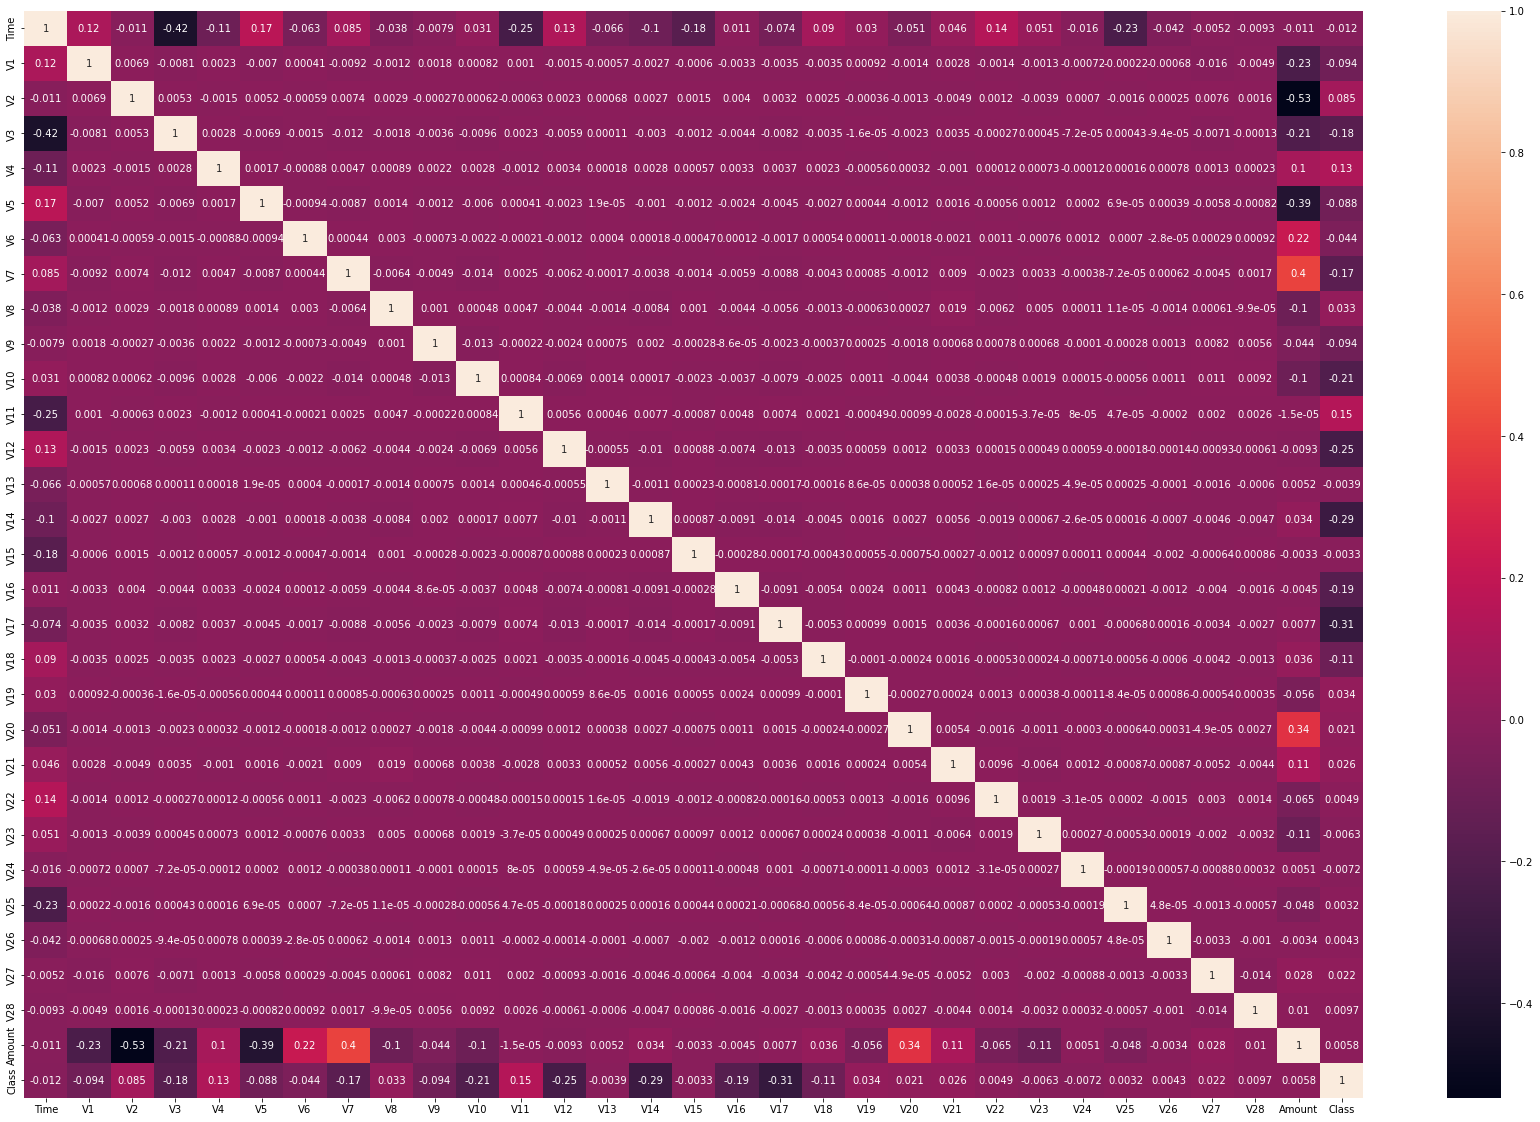

In [21]:
sns.heatmap(data.corr(), annot=True,)

In [22]:
matplotlib.rcParams["figure.figsize"] = (30,20)

In [23]:
trans = MinMaxScaler()

In [24]:
data_scale = pd.DataFrame(trans.fit_transform(data.drop(columns="Class")),columns=data.drop(columns="Class").columns)

In [25]:
data_scale = pd.concat([data_scale,data.Class], axis = 1)

In [26]:
data_scale

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,...,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0
283722,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,...,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0
283723,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,...,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0
283724,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,...,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0


<AxesSubplot:>

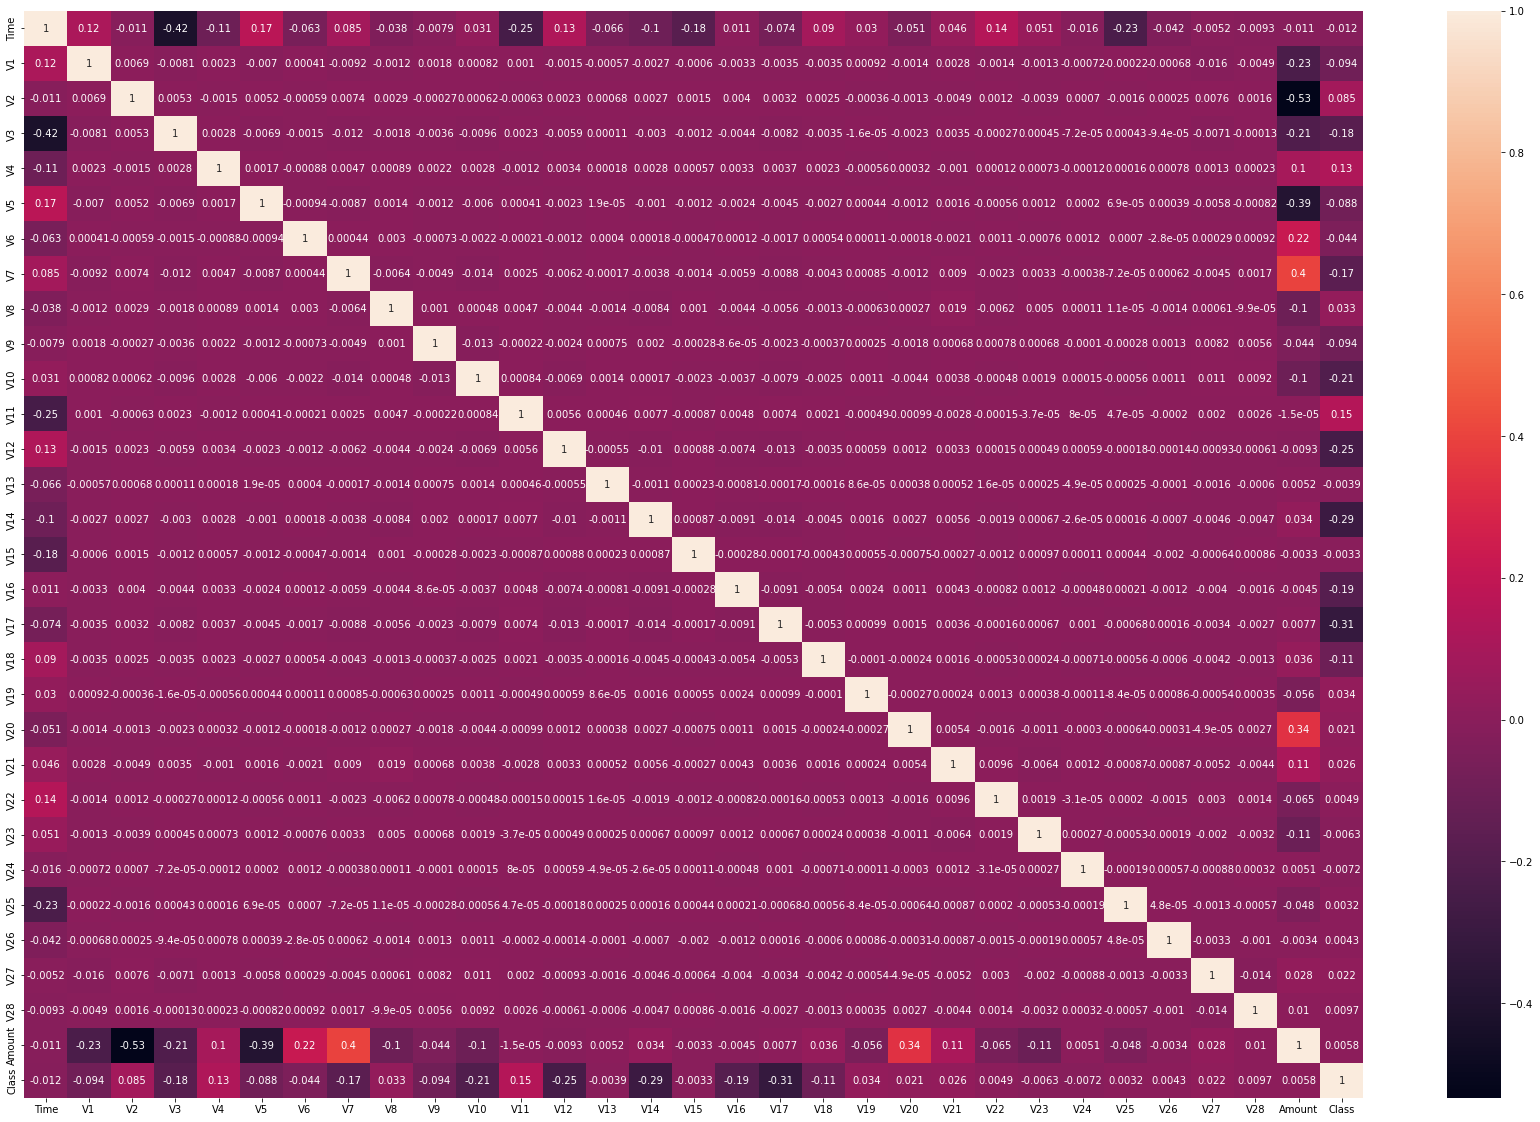

In [27]:
sns.heatmap(data_scale.corr(), annot=True,)

In [28]:
data.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

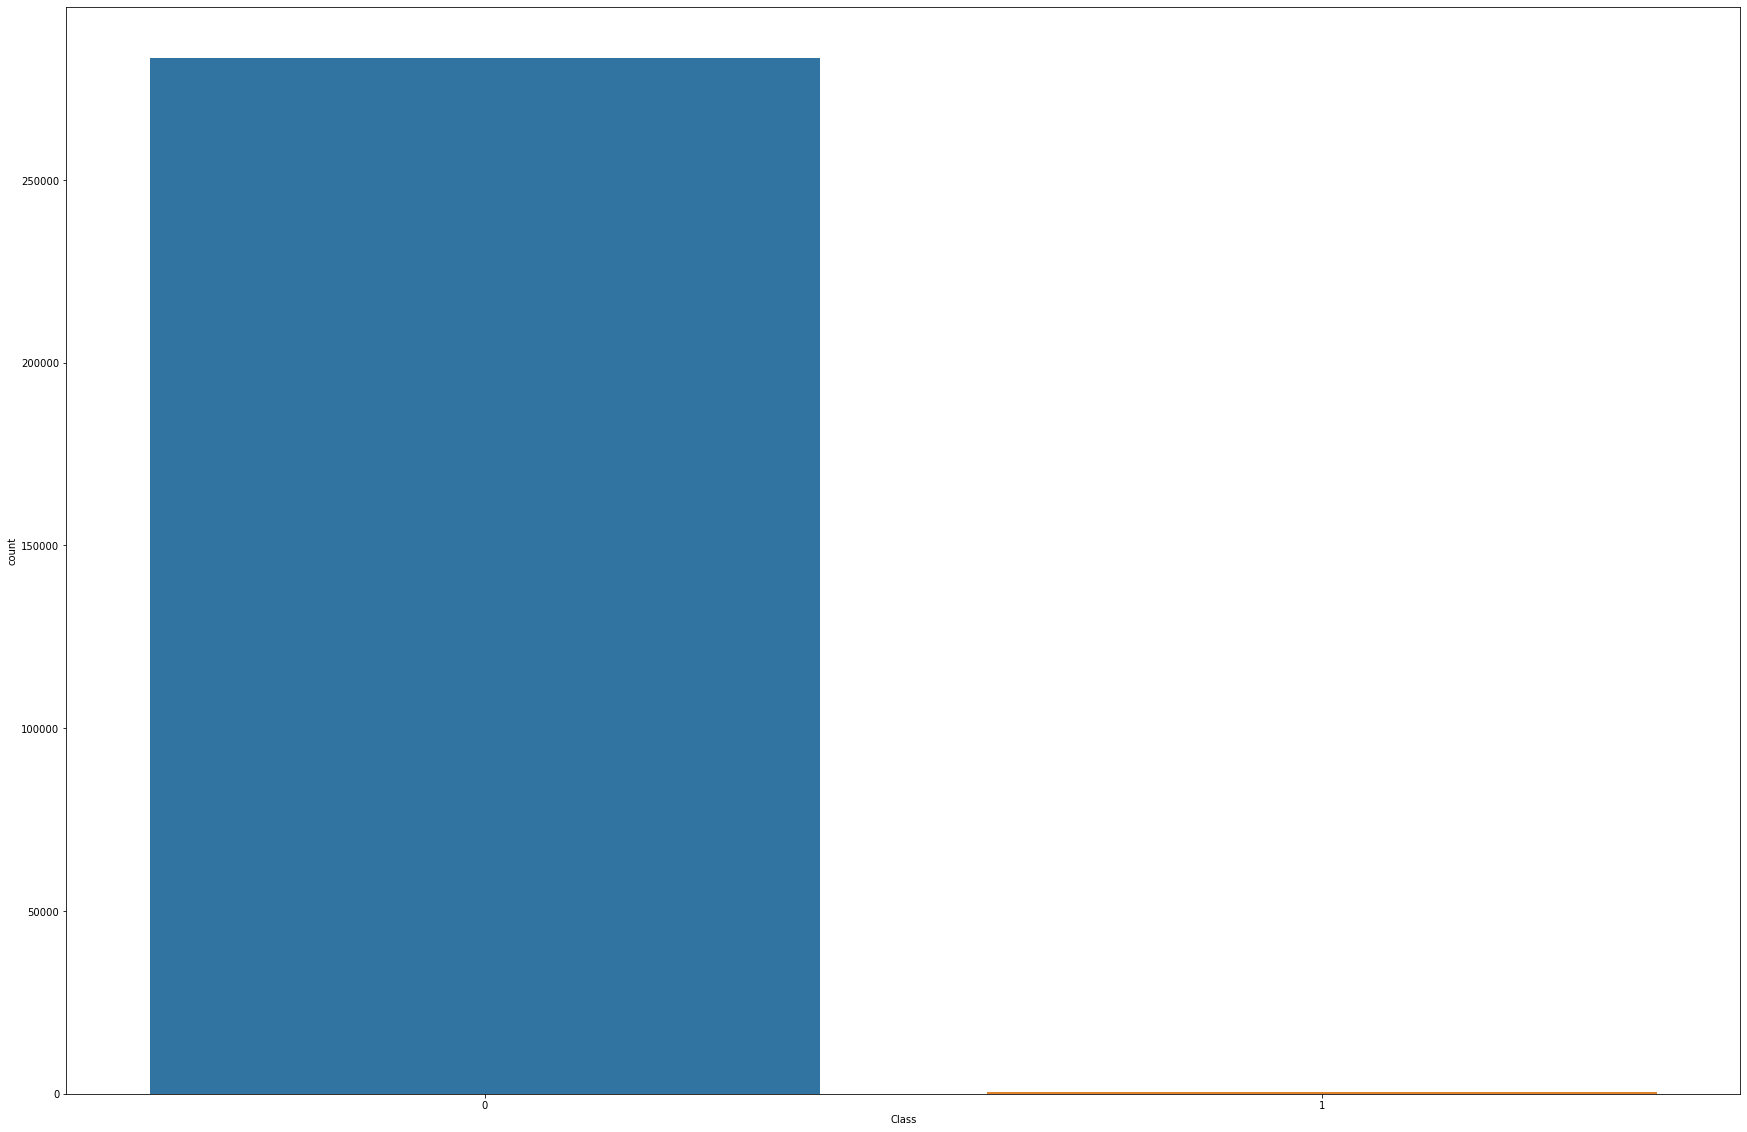

In [29]:
sns.countplot(data.Class)

In [33]:
!pip install imbalanced-learn

     |████████████████████████████████| 199 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 7.7 MB 7.4 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [34]:
import imblearn

ImportError: cannot import name '_ClassNamePrefixFeaturesOutMixin' from 'sklearn.base' (/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py)

In [35]:
from imblearn.under_sampling import NearMiss

ImportError: cannot import name '_ClassNamePrefixFeaturesOutMixin' from 'sklearn.base' (/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py)

In [32]:
nm = NearMiss()

In [33]:
X_under, y_under = nm.fit_resample(data_scale.drop(columns='Class'), data_scale['Class'])

/Users/noordeen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

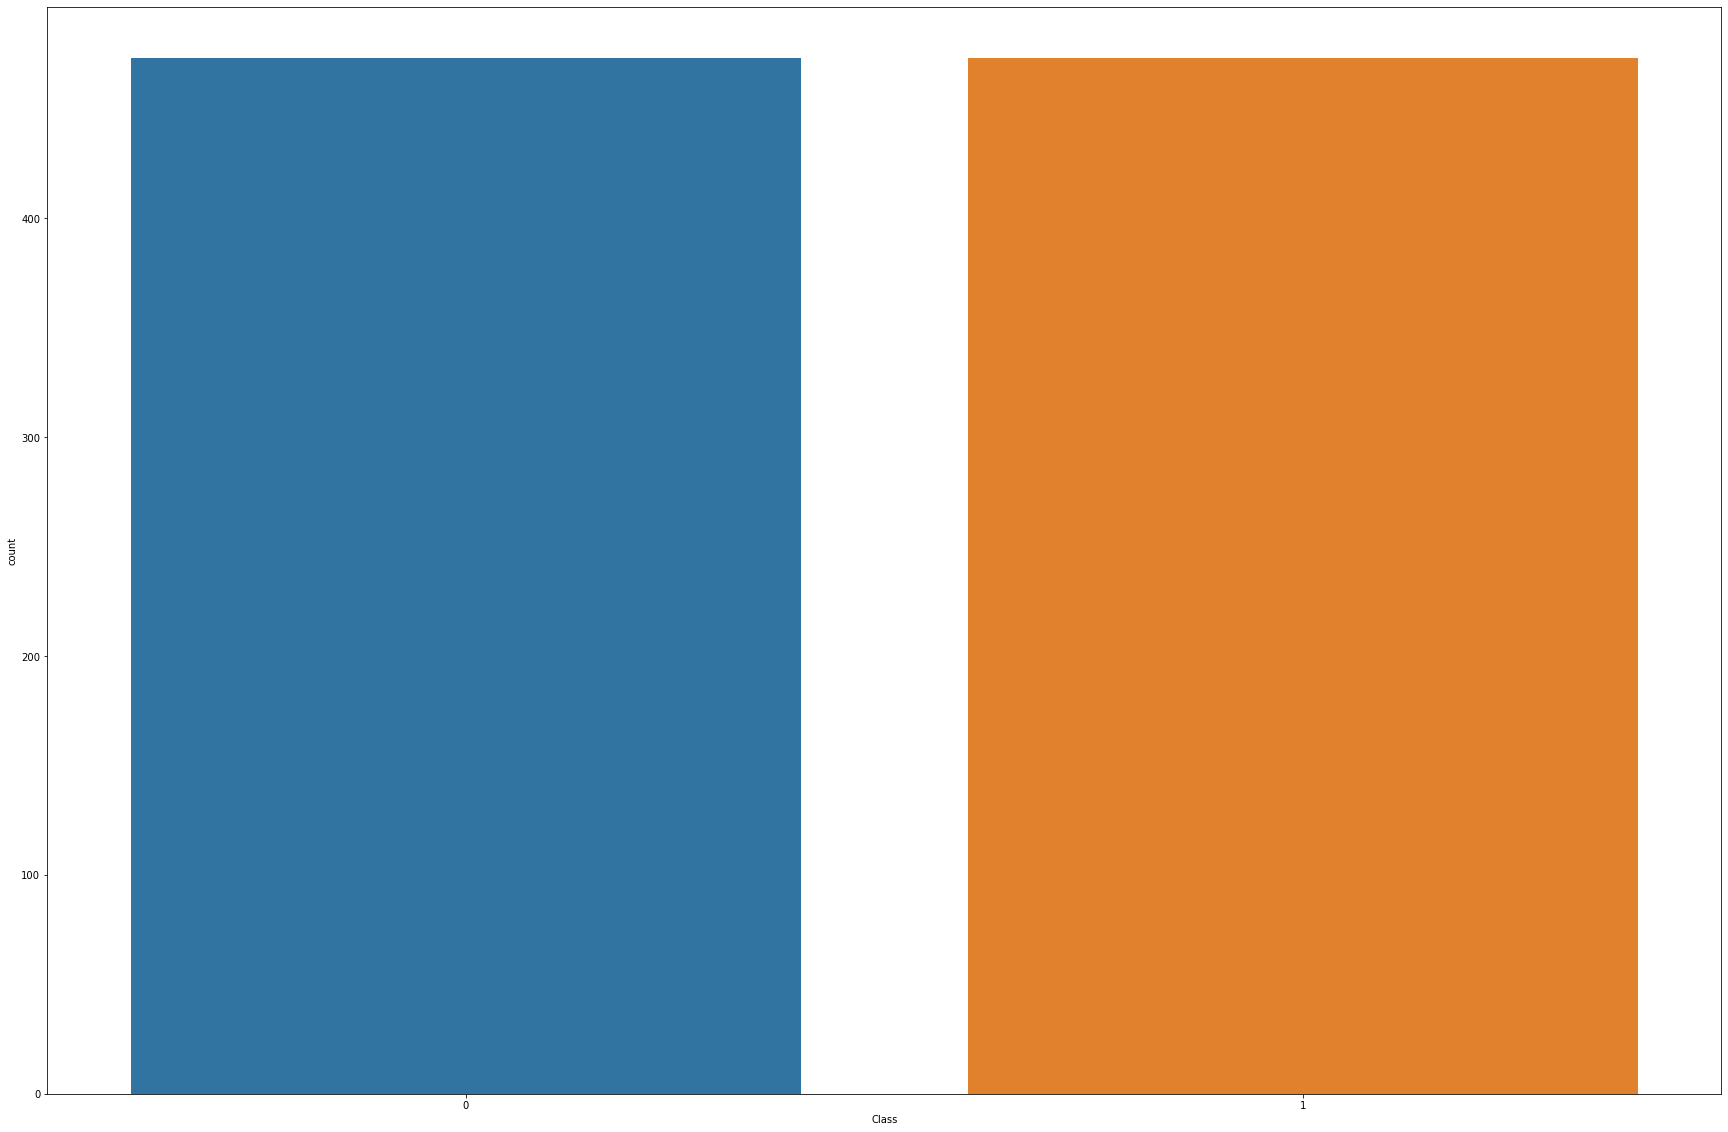

In [34]:
sns.countplot(y_under)

In [35]:
data_undersampled_nearmiss = pd.concat([X_under, y_under], axis = 1)

<AxesSubplot:>

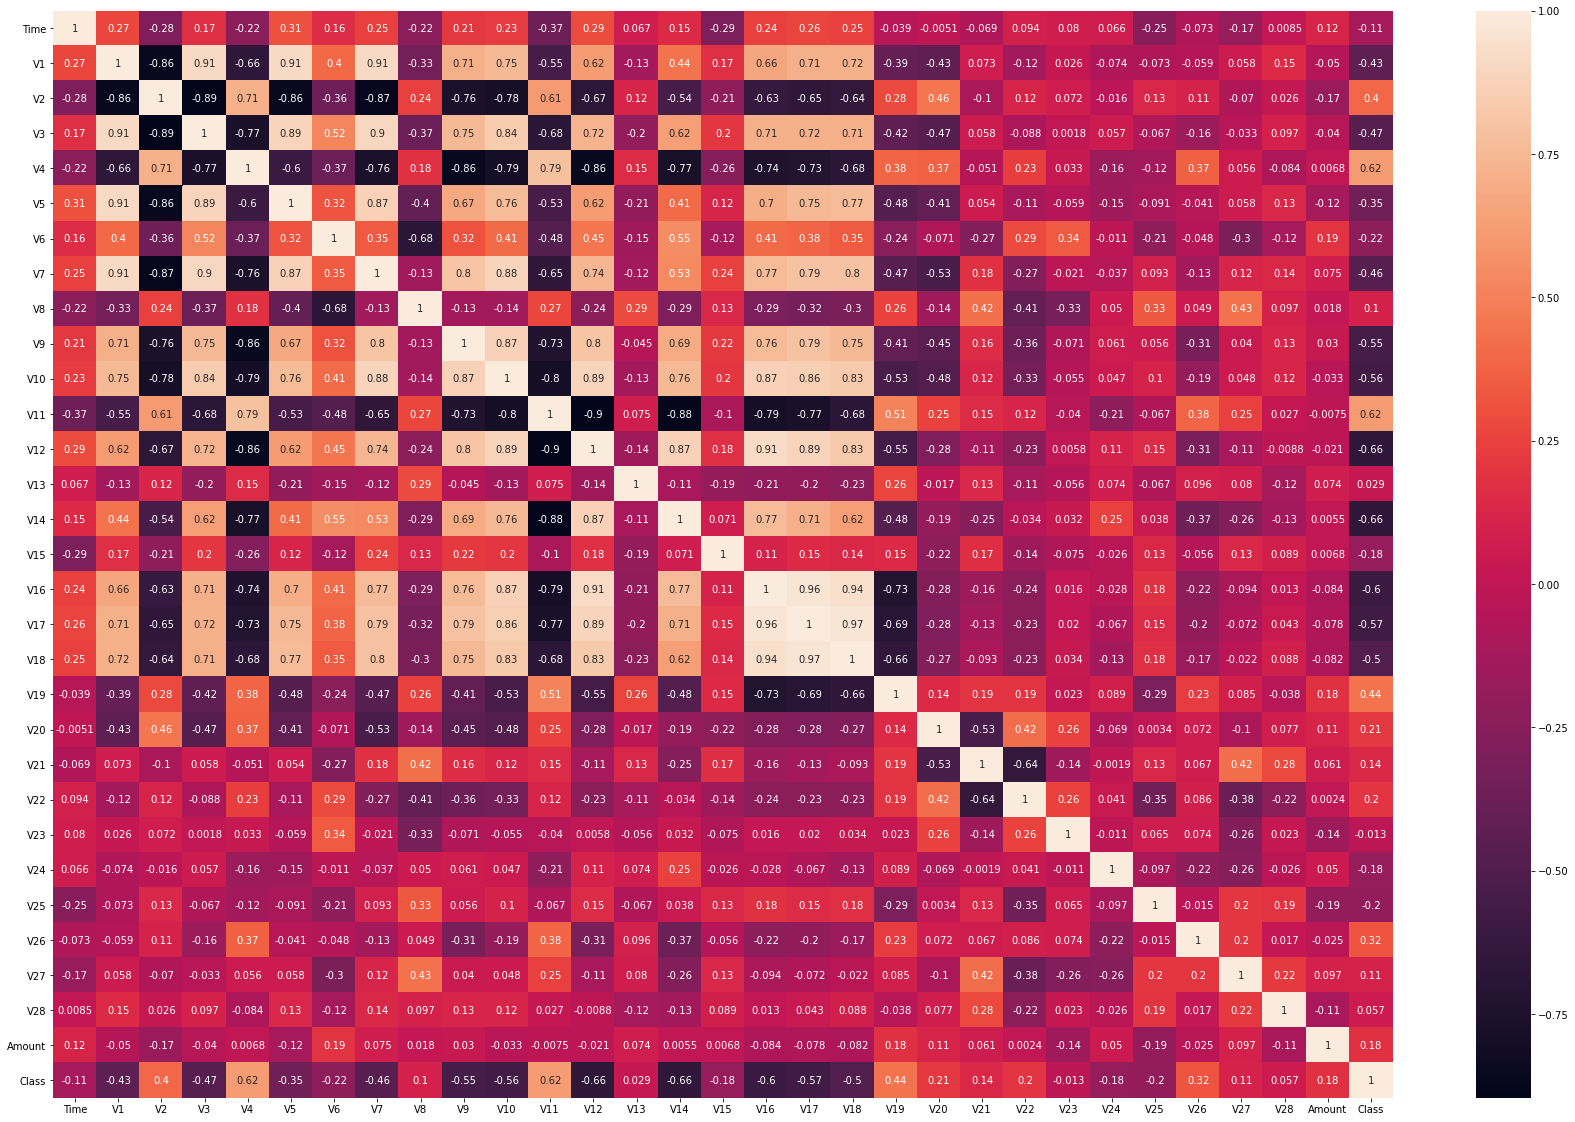

In [36]:
sns.heatmap(data_undersampled_nearmiss.corr(), annot=True,)

In [37]:
from imblearn.under_sampling import RandomUnderSampler

In [38]:
nm = RandomUnderSampler()

In [39]:
X_under, y_under = nm.fit_resample(data_scale.drop(columns='Class'), data_scale['Class'])

/Users/noordeen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

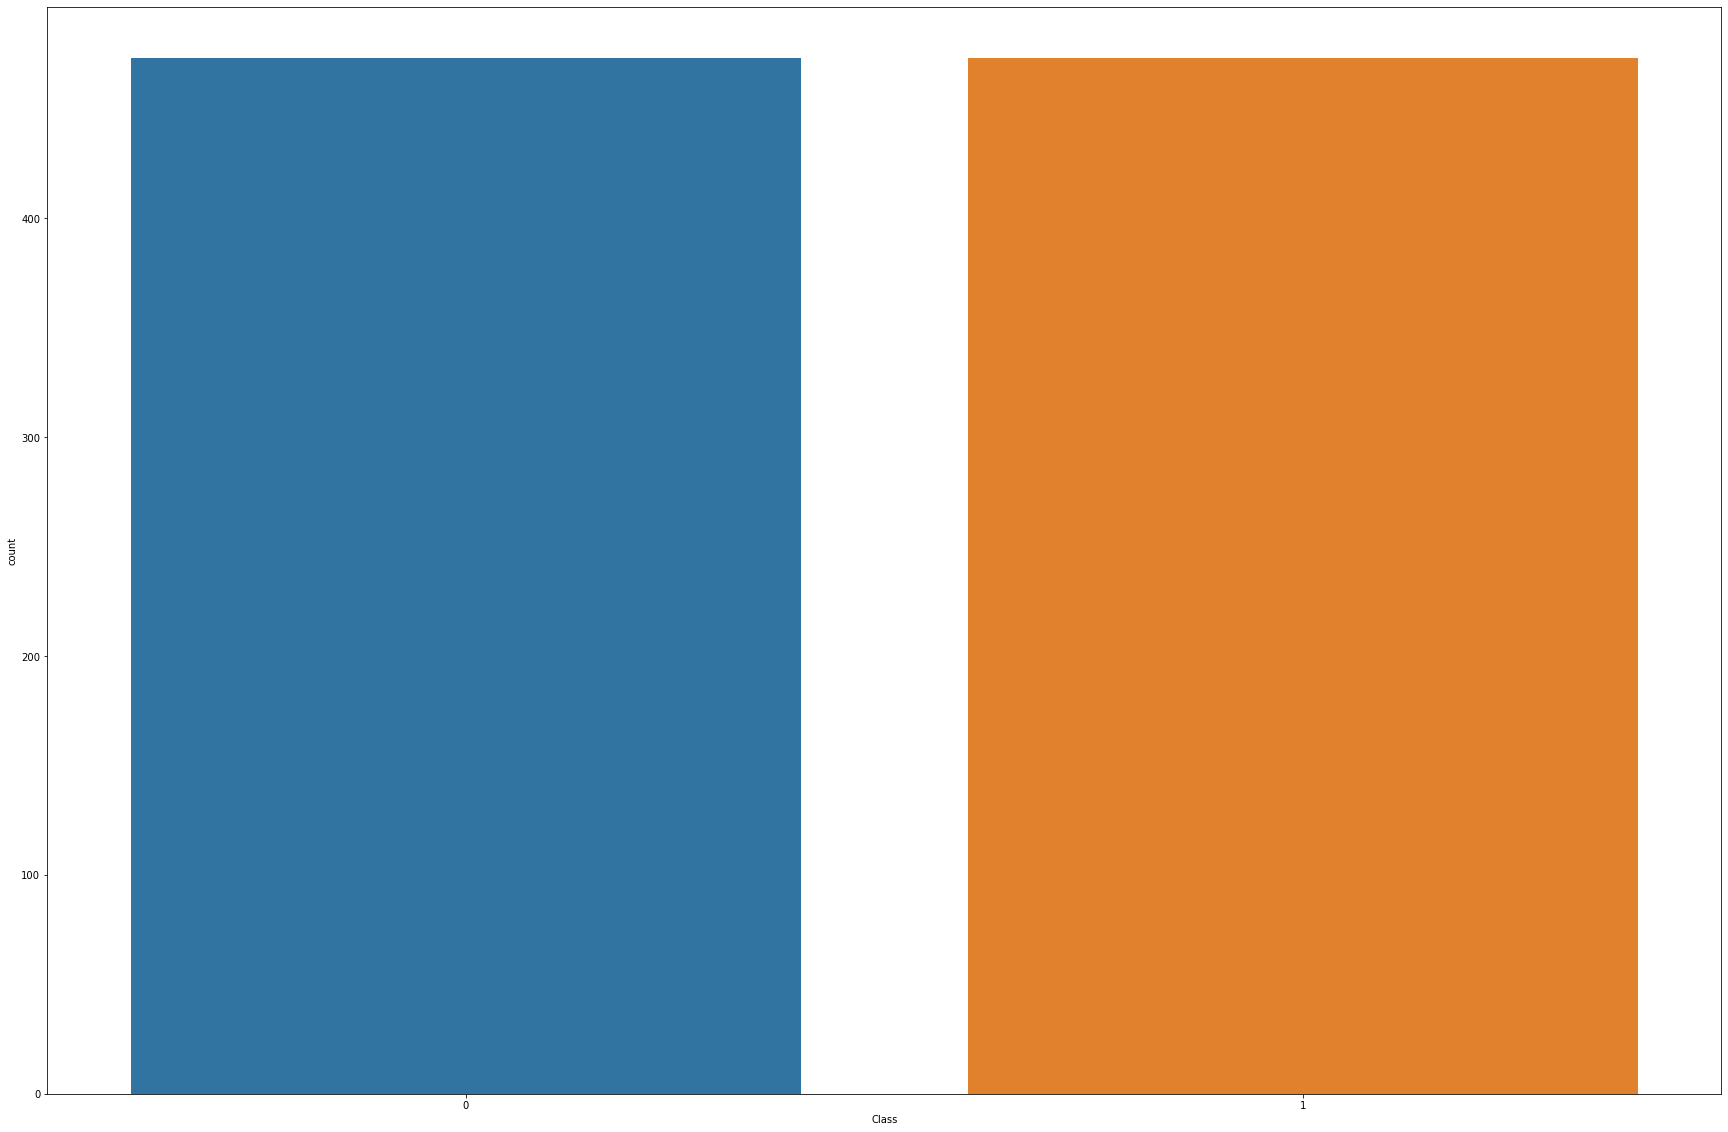

In [40]:
sns.countplot(y_under)

In [41]:
data_undersampled_randam_sample = pd.concat([X_under, y_under], axis = 1)

<AxesSubplot:>

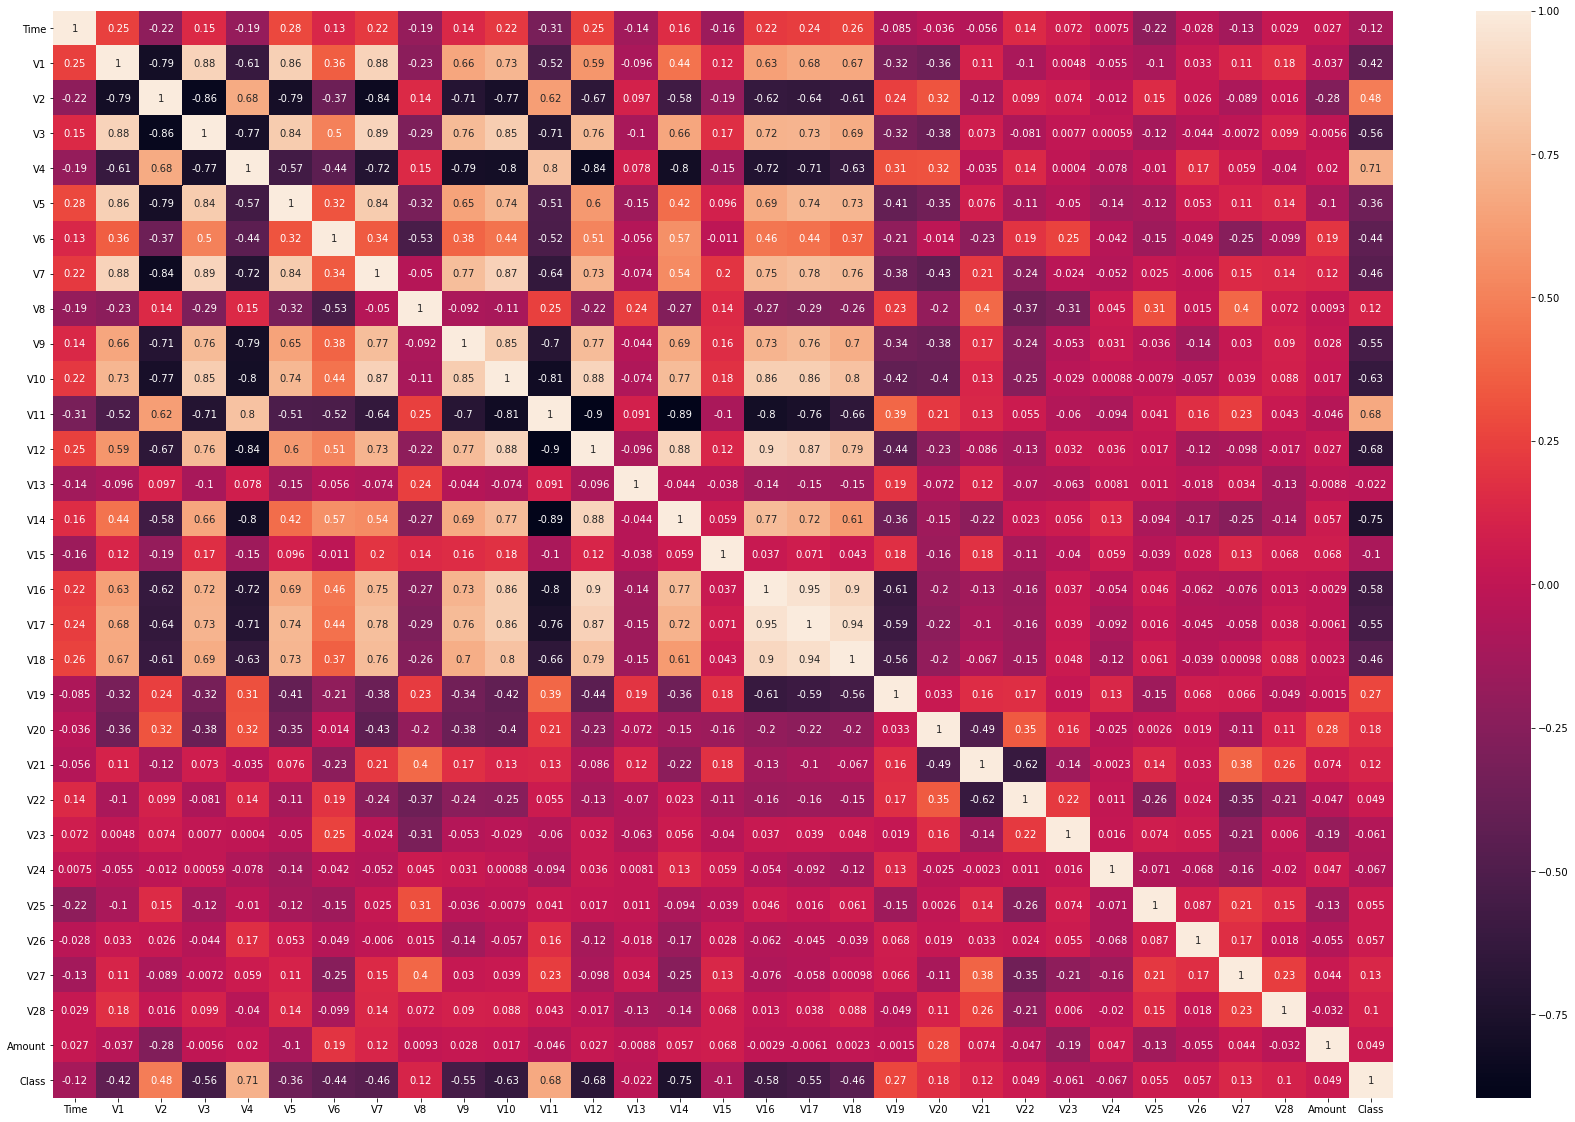

In [42]:
sns.heatmap(data_undersampled_randam_sample.corr(), annot=True,)

In [43]:
data_undersampled_nearmiss

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.151726,0.653335,0.884032,0.477973,0.521253,0.675577,0.217446,0.172828,0.915192,0.324061,...,0.590450,0.450521,0.654963,0.395984,0.644001,0.386452,0.445203,0.324243,0.000039,0
1,0.159290,0.506054,0.923901,0.356596,0.535996,0.637636,0.212214,0.149350,0.973896,0.335464,...,0.591354,0.417404,0.647462,0.402482,0.683394,0.388692,0.439719,0.322292,0.000039,0
2,0.289753,0.823505,0.834298,0.643704,0.439436,0.726220,0.226788,0.217336,0.846357,0.378752,...,0.577141,0.475533,0.663877,0.375055,0.598295,0.380062,0.436793,0.319083,0.000039,0
3,0.239849,0.844611,0.826858,0.661186,0.438752,0.731476,0.227993,0.221479,0.837187,0.376922,...,0.577045,0.479715,0.664053,0.374690,0.591443,0.378625,0.437206,0.319632,0.000039,0
4,0.438134,0.885901,0.796901,0.773321,0.420505,0.741661,0.248909,0.235568,0.803450,0.368682,...,0.577074,0.508052,0.661656,0.421661,0.583451,0.371218,0.427144,0.330326,0.004278,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0.978876,0.925541,0.779136,0.759117,0.329475,0.755171,0.242806,0.259977,0.792864,0.391646,...,0.574031,0.495141,0.674930,0.342499,0.608078,0.554231,0.421913,0.316127,0.015180,1
942,0.980063,0.981714,0.780863,0.750697,0.314516,0.768696,0.249683,0.256746,0.788051,0.423943,...,0.567454,0.511348,0.663271,0.371313,0.607201,0.546239,0.423694,0.316911,0.000030,1
943,0.980086,0.946807,0.779143,0.799053,0.272690,0.758173,0.262986,0.251741,0.798367,0.440311,...,0.573599,0.548942,0.668269,0.386556,0.536386,0.502403,0.423619,0.317068,0.003032,1
944,0.983645,0.905394,0.773440,0.743844,0.332480,0.760057,0.233425,0.251904,0.796742,0.406549,...,0.570882,0.497472,0.658660,0.357486,0.559486,0.524456,0.432844,0.307976,0.009536,1


In [44]:
data_undersampled_nearmiss.shape

(946, 31)

In [45]:
data_undersampled_nearmiss['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [46]:
data_undersampled_nearmiss = data_undersampled_nearmiss.drop(columns="Time")

In [47]:
X = data_undersampled_nearmiss.drop(columns="Class")
y = data_undersampled_nearmiss["Class"]

In [48]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 89)

In [55]:
from pycaret.classification import *

In [72]:
clf = setup(data=data_undersampled_nearmiss, target="Class", log_experiment=True, experiment_name="CreditFraud Pycaret")

,Description,Value
0,session_id,3295
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(946, 30)"
5,Missing Values,False
6,Numeric Features,29
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [73]:
top_5 = compare_models(n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9502,0.9801,0.9351,0.9625,0.9480,0.9002,0.9016,0.1310
gbc,Gradient Boosting Classifier,0.9456,0.9760,0.9320,0.9580,0.9433,0.8911,0.8938,0.1250
et,Extra Trees Classifier,0.9411,0.9815,0.9258,0.9543,0.9385,0.8820,0.8845,0.1070
lightgbm,Light Gradient Boosting Machine,0.9396,0.9802,0.9259,0.9518,0.9371,0.8790,0.8819,0.2210
ada,Ada Boost Classifier,0.9306,0.9611,0.9259,0.9334,0.9283,0.8610,0.8634,0.0600
qda,Quadratic Discriminant Analysis,0.9260,0.9532,0.9228,0.9265,0.9237,0.8519,0.8536,0.0140
dt,Decision Tree Classifier,0.9186,0.9186,0.9226,0.9152,0.9168,0.8370,0.8406,0.0110
knn,K Neighbors Classifier,0.9124,0.9389,0.8549,0.9628,0.9031,0.8243,0.8321,0.2480
nb,Naive Bayes,0.9094,0.9658,0.8394,0.9724,0.8999,0.8182,0.8270,0.0080
lr,Logistic Regression,0.8988,0.9471,0.8208,0.9678,0.8864,0.7968,0.8076,0.5210


In [74]:
top_5

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=3295, verbose=0,
                        warm_start=False),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=1

In [64]:
for i in top_5:
    print(i)
    tune_model(i)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9104,0.9541,0.8788,0.9355,0.9062,0.8207,0.8222
1,0.9552,0.9840,0.9394,0.9688,0.9538,0.9104,0.9108
2,0.9697,0.9706,0.9688,0.9688,0.9688,0.9393,0.9393
3,0.9545,0.9825,1.0000,0.9143,0.9552,0.9093,0.9130
4,0.9091,0.9320,0.9091,0.9091,0.9091,0.8182,0.8182
5,0.9091,0.9669,0.9091,0.9091,0.9091,0.8182,0.8182
6,0.9697,0.9899,0.9394,1.0000,0.9688,0.9394,0.9411
7,0.9394,0.9440,0.9394,0.9394,0.9394,0.8788,0.8788
8,0.8939,0.9118,0.8182,0.9643,0.8852,0.7879,0.7971
9,0.9242,0.9706,0.9091,0.9375,0.9231,0.8485,0.8489


In [65]:
tuned_model = [tune_model(i) for i in top_5]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9104,0.9541,0.8788,0.9355,0.9062,0.8207,0.8222
1,0.9552,0.9840,0.9394,0.9688,0.9538,0.9104,0.9108
2,0.9697,0.9706,0.9688,0.9688,0.9688,0.9393,0.9393
3,0.9545,0.9825,1.0000,0.9143,0.9552,0.9093,0.9130
4,0.9091,0.9320,0.9091,0.9091,0.9091,0.8182,0.8182
5,0.9091,0.9669,0.9091,0.9091,0.9091,0.8182,0.8182
6,0.9697,0.9899,0.9394,1.0000,0.9688,0.9394,0.9411
7,0.9394,0.9440,0.9394,0.9394,0.9394,0.8788,0.8788
8,0.8939,0.9118,0.8182,0.9643,0.8852,0.7879,0.7971
9,0.9242,0.9706,0.9091,0.9375,0.9231,0.8485,0.8489


In [66]:
tuned_model

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=11,
                            max_features='log2', max_leaf_nodes=None,
                            min_impurity_decrease=0.4, min_impurity_split=None,
                            min_samples_leaf=2, min_samples_split=4,
                            min_weight_fraction_leaf=0.0, n_estimators=300,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=1972, subsample=0.7, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                      class_weight='balanced_subsample', criterion='gini',
                      max_depth=10, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.005,
                

In [67]:
blend_models(estimator_list=top_5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9254,0.9554,0.8788,0.9667,0.9206,0.8505,0.8540
1,0.9701,0.9973,0.9697,0.9697,0.9697,0.9403,0.9403
2,0.9697,0.9954,0.9688,0.9688,0.9688,0.9393,0.9393
3,0.9091,0.9770,0.9375,0.8824,0.9091,0.8183,0.8199
4,0.9242,0.9743,0.9394,0.9118,0.9254,0.8485,0.8489
5,0.9545,0.9835,0.9394,0.9688,0.9538,0.9091,0.9095
6,0.9394,0.9945,0.9091,0.9677,0.9375,0.8788,0.8804
7,0.9242,0.9725,0.9091,0.9375,0.9231,0.8485,0.8489
8,0.8939,0.9633,0.8182,0.9643,0.8852,0.7879,0.7971
9,0.9091,0.9734,0.8788,0.9355,0.9062,0.8182,0.8197


VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                             

In [76]:
!mlflow ui

[2021-11-07 10:48:28 +0530] [43723] [INFO] Starting gunicorn 20.1.0
[2021-11-07 10:48:28 +0530] [43723] [INFO] Listening at: http://127.0.0.1:5000 (43723)
[2021-11-07 10:48:28 +0530] [43723] [INFO] Using worker: sync
[2021-11-07 10:48:28 +0530] [43725] [INFO] Booting worker with pid: 43725
^C
[2021-11-07 10:51:38 +0530] [43723] [INFO] Handling signal: int
[2021-11-07 10:51:38 +0530] [43725] [INFO] Worker exiting (pid: 43725)


In [75]:
stack_models(top_5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9701,0.9964,0.9697,0.9697,0.9697,0.9403,0.9403
1,0.8955,0.9697,0.8788,0.9062,0.8923,0.7909,0.7913
2,0.9545,0.9605,0.9375,0.9677,0.9524,0.9089,0.9093
3,0.9697,0.9954,0.9688,0.9688,0.9688,0.9393,0.9393
4,0.9394,0.9605,0.8750,1.0000,0.9333,0.8782,0.8848
5,0.8939,0.9835,0.8750,0.9032,0.8889,0.7875,0.7879
6,0.9697,0.9954,0.9688,0.9688,0.9688,0.9393,0.9393
7,0.9242,0.9779,1.0000,0.8649,0.9275,0.8490,0.8589
8,0.9545,0.9807,0.9375,0.9677,0.9524,0.9089,0.9093
9,0.9545,0.9945,0.9091,1.0000,0.9524,0.9091,0.9129


StackingClassifier(cv=StratifiedKFold(n_splits=10,
        random_state=RandomState(MT19937) at 0x7FDAEC15D740, shuffle=False),
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samp...
                     

In [ ]:
model_use,model_nnlm50, model_nnlm128, model_st1,model_st2,model_st3 = LoadModel_url()
brand__id=list(brand_consolidate.keys())
for id in brand_consolidate.keys():
#for id in ['fa683d6e-44f4-4ba7-8d16-34275f46bbb4']:
#for id in ['2fc09714-28d4-4408-a7de-ad25ea046753']:
#for id in ['2fc09714-28d4-4408-a7de-ad25ea046753']:
  print(id)
  brand_data = brand_consolidate[id]
  print(brand_data)
  print(brand_data.keys())
  print(brand_data['custom_category'])
  custom_category_improvements = []

  for cus_cat in brand_data['custom_category']:
    improvements = {}
    print(cus_cat)
    cat_message = "CUSTOM_"+cus_cat
    cat_cov_prob = "CUSTOM_"+cus_cat+"_prob"
    all_messages = brand_data[cat_message]
    if len(all_messages)>4:
      data_cluster_final_filter_from = cluster_creation(all_messages, model_use,model_nnlm50, model_nnlm128, model_st1,model_st2,model_st3)
      if not isinstance(data_cluster_final_filter_from, pd.DataFrame):
        continue 
      data_cluster_final_filter_from["conversation_resolution"] = data_cluster_final_filter_from['FilteredFirstnPairsQuestionSorted'].apply(lambda x: find_uplift_percent(x,data_message,brand_data,cat_cov_prob))
      data_cluster_final_filter_from["agent_response"] = data_cluster_final_filter_from['FilteredFirstnPairsQuestionSorted'].apply(lambda x: find_agent_response(x,data_message,brand_data,cat_cov_prob))
      
      total_will_resolution = data_cluster_final_filter_from['conversation_resolution'].sum()
      category = cus_cat
      conversation_percentage = [(i['Conversation'],i['Resolution Rate']) for i in brand_data['chart_resolution_custom_rate'] if i['']==category ]
      conversation_total = conversation_percentage[0][0]
      conversation_resolution = conversation_percentage[0][1]
      new_c = float((float(conversation_resolution[:-1])/100)*conversation_total)+total_will_resolution
      new_resolution = (new_c/conversation_total)*100
      new_resolution = math.floor(new_resolution)
      text_uplift = str(str(math.floor(float(conversation_resolution[:-1])))+"% to "+str(math.floor(new_resolution)))+"%"

      word_summary = list(data_cluster_final_filter_from['GPT3_summary_one_word_summary'].values)
      res_summ = [i.strip() for i in word_summary]
      topics = ' / '.join(res_summ[:2]).replace("'", '').replace('"','')
      improvements = {}
      improvements['Category'] = cus_cat.title()
      improvements['Topics'] = topics
      improvements['Potential Uplift in Resolution Rate by Chatbot'] = text_uplift

      custom_category_improvements.append(improvements)
    elif(len(all_messages)!=0):
      total_will_resolution = 0

    if total_will_resolution>0:
      detailed_report_name = brand_data.get('detailed_report_name_custom',[])
      custom_category_improvements_detailed = []
    
      for index, row in data_cluster_final_filter_from.iterrows():
        detailed_result = {}
        print(row["GPT summary"], row["FilteredFirstnPairsQuestionSorted"],row['agent_response'])
        detailed_result['Topics'] = str(row["GPT summary"])
        detailed_result['Example Messages'] = str(row["FilteredFirstnPairsQuestionSorted"])
        detailed_result['Potential Response Add-ons from Agent Responses'] = str(row['agent_response'])
        custom_category_improvements_detailed.append(detailed_result)
      brand_data["detailed_cluster_result_"+cus_cat] = custom_category_improvements_detailed
      detailed_report_name.append("detailed_cluster_result_"+cus_cat)
      brand_data['detailed_report_name_custom'] = detailed_report_name

  data_cluster_final_filter_from = pd.DataFrame()
  brand_data['custom_improvements'] = custom_category_improvements
  brand_consolidate[id] = brand_data
  

In [ ]:
model_use,model_nnlm50, model_nnlm128, model_st1,model_st2,model_st3 = LoadModel_url()
brand__id=list(brand_consolidate.keys())
#for id in brand_consolidate.keys():
#for id in ['fa683d6e-44f4-4ba7-8d16-34275f46bbb4']:
#for id in ['2fc09714-28d4-4408-a7de-ad25ea046753']:
for id in ['b55cbda5-ae0f-44d2-b107-61b9cde0c413']:
  print(id)
  brand_data = brand_consolidate[id]
  print(brand_data)
  print(brand_data.keys())
  custom_category_improvements = []

  for cus_cat in ['unknown']:
    improvements = {}
    print(cus_cat)
    cat_message = "CUSTOM_"+cus_cat
    cat_cov_prob = "CUSTOM_"+cus_cat+"_prob"
    all_messages = brand_data[cat_message]
    if len(all_messages)>4:
      data_cluster_final_filter_from = cluster_creation(all_messages, model_use,model_nnlm50, model_nnlm128, model_st1,model_st2,model_st3)
      if not isinstance(data_cluster_final_filter_from, pd.DataFrame):
        continue 
      data_cluster_final_filter_from["conversation_resolution"] = data_cluster_final_filter_from['FilteredFirstnPairsQuestionSorted'].apply(lambda x: find_uplift_percent(x,data_message,brand_data,cat_cov_prob))
      data_cluster_final_filter_from["agent_response"] = data_cluster_final_filter_from['FilteredFirstnPairsQuestionSorted'].apply(lambda x: find_agent_response(x,data_message,brand_data,cat_cov_prob))
      
      total_will_resolution = data_cluster_final_filter_from['conversation_resolution'].sum()
      category = cus_cat
      conversation_percentage = [(i['Conversation'],i['Resolution Rate']) for i in brand_data['chart_resolution_faq_rate'] if i['']=="Other(Custom)" ]
      conversation_total = conversation_percentage[0][0]
      conversation_resolution = conversation_percentage[0][1]
      new_c = float((float(conversation_resolution[:-1])/100)*conversation_total)+total_will_resolution
      new_resolution = (new_c/conversation_total)*100
      new_resolution = math.floor(new_resolution)
      text_uplift = str(str(math.floor(float(conversation_resolution[:-1])))+"% to "+str(math.floor(new_resolution)))+"%"

      word_summary = list(data_cluster_final_filter_from['GPT3_summary_one_word_summary'].values)
      res_summ = [i.strip() for i in word_summary]
      if len(res_summ)<5:
        topics = ' / '.join(res_summ).replace("'", '').replace('"','')
      else:
        topics = ' / '.join(res_summ[:5]).replace("'", '').replace('"','')
      improvements = {}
      improvements['Category'] = cus_cat.title()
      improvements['Topics'] = topics
      improvements['Potential Uplift in Resolution Rate by Chatbot'] = text_uplift

      custom_category_improvements.append(improvements)
    else:
      total_will_resolution = 0

    if total_will_resolution>0:
      detailed_report_name = brand_data.get('detailed_report_name_custom',[])
      custom_category_improvements_detailed = []
    
      for index, row in data_cluster_final_filter_from.iterrows():
        detailed_result = {}
        print(row["GPT summary"], row["FilteredFirstnPairsQuestionSorted"],row['agent_response'])
        detailed_result['Topics'] = str(row["GPT summary"])
        detailed_result['Example Messages'] = str("\n".join(row["FilteredFirstnPairsQuestionSorted"]))
        detailed_result['Potential Response Add-ons from Agent Responses'] = str("\n".join(row['agent_response']))
        custom_category_improvements_detailed.append(detailed_result)
      brand_data["detailed_cluster_result_"+cus_cat] = custom_category_improvements_detailed
      detailed_report_name.append("detailed_cluster_result_"+cus_cat)
      brand_data['detailed_report_name_unknown'] = detailed_report_name
      data_cluster_final_filter_from = pd.DataFrame()

  
  brand_data['new_custom_add'] = custom_category_improvements
  brand_consolidate[id] = brand_data
  

In [38]:
a = ['What is your phone number?', 'I ordered 3 tacos. 2 of them is grilled chicken with cheese and 1 of them is fish without cheese', 'however i received all grilleed chicken with cheese.\n\n1. I paid more the fish\n2. I requested for no cheese \n\nEnd up all are grilled chicken w cheese...', "Hi Guzman y Gomez - Singapore HQ,\n\nI'm Joi from Aemorph Productions, Lovely to E-meet you. 😍\n\nDid you know that in 2022, over 80% of online is VIDEO?\nMobile video consumption has been rising by 100% each year & 83% of marketers say VIDEOS gives them an increase on ROI\nVideo content is now the No.1 way to get your message across to your audience.\n\nTell us your story and we will help bring it to life!\n \nContact us NOW for a FREE consultation and you might be on your way to creating unique & engaging content for your business!\n\nWebsite: https://aemorph.com/  \nWhatsApp: +65 8837 1812", 'There was a problem while applying, can you assist me ?', '+6586180480 URGENT', 'i would like to know how does the pay works?', '😞 No', 'Hi what does GFK and BSN mean in the hourly pay for part timers?', 'doesnt answer the question', nan, 'भाई video ko like cmante करो भाई🙏 15अगस्त 🇨🇮', 'is this offer include o  weekend?', 'I meant is this offer includes weekend', 'Can you please help me with something x 🙏', 'I want to join', 'The website shows incorrect number', 'URGENT', 'Deliveroo Order 1486 \nPh no. 91476372', 'i am from outside of the country, is there anyway to apply ?', 'i am forigner and not living in singapore right now', 'is there any way', '???', 'do you guys do giftcards??', 'hello can the student deal be redeemed on weekends ?', 'Hi I just bought takeaway from your shop, just wondering if your takeaway boxes are oven safe', 'I need some plan to go for lunch today', 'No body is picking up phone at Novena Square', 'Shalom!\n\nWould you be keen and open to explore beverage solutions and move into ways to grow together?\n\nWe house 1,300+ affordable premium bespoke tea blends in our tea library and have capability to formulate new and/or match any tea blends. \nWe also OEM from bespoke loose tea blends to bagging the loose teas to nylon sachet to tea capsule (Nespresso compatible) to bottled beverages like cold brew tea, sparkling tea, kombucha, tea infused beers to tea cordials to DIY bubble teas to tea mocktail and cocktail infusion.\n\nYour thoughts.\n\nE sales@dreiheithouse.com\nT (65) 6563 2040\nW www.dreiheithouse.com\nA 421 Tagore Industrial Avenue #02-13 Tagore 8 Singapore 787805', 'Is there a name we can attention the email to?', 'Sir my results', 'I need a job in your company', 'No', 'Hi iwent down to ur outlet and got the non spicy version', 'Im enquiring to check delivery order #2349', 'URGENT', '97594511', 'We only received 7', 'Order #2349', 'Can you tell me what the issue is?', 'Nope', 'Bhai video like me 🙏', 'Hi, Good Afternoon\n\nI would like to follow up with you to see if you have received my earlier message?\n\nThis is regarding your brand being mentioned on our article for the Top brands in your industry.\n\nWe are expecting to have thousands of readers on your article next month onwards. Thus do let me know soon if you are going to share it on your website and Facebook? So that we could lock it in for you.\n\nPs: We are doing all of this for free to support the local community of readers and writers and thus your support will mean alot to us.\n\nThank you.\n\nRegards,\nAisyah\nHead of business development\nHyperlocalnation.com', 'I am hoping for tampines branch', 'Urgent : 82000361', nan, 'Sorry I sent this\n by mistake', 'The $9.90 set', 'I have the receipt and also took a pic of this', 'I am from Sri Lanka', 'Is there have any training jobs ?', 'Cleaning side or something else', 'Hi I would like to check the code can be used grad or food panda?', 'dhh', 'espanol?', 'hablo engls', 'Dear Guzman, no complaints here, but wanted to share that your paper box had kept my 4 year old occupied for almost an hour at lunch. 😀', 'i had ordered a tofu ranchero bowl to go feom your katong outket', 'the portion seems to have chicken', 'I shared with the store yesterday', 'this hurted my religious sentiments', 'pls connect with your store mgr - they have all details', 'also send me yourmail ID - I will forward you the email', 'awaiting your confirmation', 'Hi just wanna check if your takeaway boxes are oven safe thank you!', 'do u got quota？', 'not..', 'does not work', 'waiting', 'hi guzman! My parents ordered takeaway from Funan’s Gyg and there seems to be some complications…', '8399 6393', 'URGENT', 'My parents ordered at around 6.57pm from Funan’s outlet and as seen from the photo the label is correct as per what my parents has ordered however, when i opened my food excited to eat, i was disappointed that my order was not what i ordered. This has only happened once from the many times i ordered but even with the fish being misplaced by slow roasted beef, my order also did not have any cheese :,( which had no flavour! I hope u can take note of this and hopefully refund my parents. Thank u', 'Maybe ur worker is being overworked, but i hope we can also be compensated for this \U0001f972\U0001f972 a', 'both ordered were messed up \U0001f972', 'May i know how you would be refunding? Do notify me on it as well thanks!', 'Hi I am trying to get in touch with gyg outlook at ARC.  Do you have the contact', 'do you have the contact #s for all your outlets?', 'Thanks. Usually crowd to  meh e?', 'I’m already a creep', 'Crew', 'Link is broken :(', 'Hi i made an order 1830 just now', 'can i confirm it went through?', 'can i have a contact number to confirm delivery?', 'i ordered online', 'Joe to do pick-up', 'How', 'I was only browsing and was going to use the 10 credit I had but went through before I had a chance', 'Order no 1027 I want cancelled  and refunded back to my account', 'I also ordered extra guac on the side which came like this. It looks to me like it’s just mashed avocadoes rather than guacamole. Please advise if this is supposed to be the way? 🥺🥺', "I m very hungry now, don't know what to do- to reorder or never to order from guzman again", 'Dear whomever it may concern,  We are a group of year 3 NYP students conducting a survey on our app idea to assist restaurants in improving their service times in order to increase sales and improve the dining experience for customers. We are requesting your assistance in completing our survey if possible, by 27 July, so that we can better understand the needs of restaurants. It will only take you less than 10 minutes to complete our survey.  We appreciate your help and hope that you could get back to us soon, thank you. Attached is the link where you can access the survey.  Survey: https://forms.gle/TkpcwihysMF8naRN8', 'I love GYG, it’s a Friday meal for me and my partner. Burritos and Tacos every Friday 🤭', 'Okies will definitely drop out😍 suntec city one and the waiting nex one', 'Hi I placed a duplicate order. Some glitch on the website', 'Urgent 1183', 'Could you initiate a refund for the  duplicate order', 'no hablo ingles', 'Jobs have', 'Please help me', 'Reply', 'WhatsApp nb send me', 'Want to know about birthday party order', 'URGENT 96422354', 'Can you guess the numbers and win not a joke just believe me and get paid okay ✅👆', 'today', 'anot', 'Could you please conffim the order', 'URGENT', '9381 5667', 'We placed an order a minute ago, the money from the card got deducted but the order confirmation is not received yet', "Also the order number hasn't got generated because it never stopped processing the order only and still the money got deducted", '2526 is the order no', 'Student combo', 'Birthday voucher', 'Are you a bot', 'Can I check if you serve students and fitness tenants?', 'Would I be able to get in touch with the business development person?', 'Let me know if I can have a number or email. Thanks!', "I'm Beronica - the Head of Merchants at WhyQ. WhyQ partners with over 5,000 merchants in Singapore.\n\nWe have the most affordable solution in the market for creating a personalised apps for F&B merchants on Android and IOS. Many established F&Bs have created their own app to create brand awareness, enable direct engagement with their customers and reduce commissions paid to food delivery platforms for self pick up.\n\nI’m sure many companies have approached you regarding this since the government has also been pushing for a Smart Nation Initiative. May I also get the chance to share with you what we have to offer? If you wouldn’t mind sharing your email address I will be able send to you with our deck with afew case studies, our portfolio and most importantly our proposal to you\n\nI would really appreciate the opportunity. Thank you so much :)", 'My contact is 86848841', 'Roti master', "I'm on student pass", "Are you allowing student's for job", 'Yes sir i already filled up the form', 'Yes sir i have already filled up the form', 'I just bought a take out from the tanjong pagar branch', 'They gave me hash browns instead of churros', 'Will i be offered any compensation? A refund or something', 'Is it the bishan one?', 'We have. Received a package of food that we did not order! To 02-04, 51 Jervois Rd to a Dennis Tan who does not live here! order GF 774F', 'Hi Good evening is there job  vacancy for western chef', nan, 'Love me video 💔 वीडियो को शेयर करो भाई और like cmante karo bhai 🙏', 'Hi sir,\n\nIf you are looking for any bagasse tableware products then contact us\n\nBagasse Disposable Tableware Products - \nPlates | Tray | Lids | Bowls | Clamshell | Container\n\n🔖  DISCOUNT for Bulk Orders\n📑  Message us for Orders / Inquiries\n\n🚫  No compromise in Quality\n\nContact us for More Details\n\n📞 +(91)-8866220397\n\n📩  exosisinternational@gmail.com \n\n\nWhatsApp : https://wa.me/+918866220397\n\nInstagram : https://www.instagram.com/invites/contact/?i=178ycumcwi04z&utm_content=oxiclkt', 'Team Exosis♥️', 'I need help to retrieve a receipt for 2 purchases on 6 July.', 'URGENT', '97217200 - Sheena', 'hi today is the 6th of the month. Can i check if you have the $6 specials at Grabkitchen ?', 'I was double charged recently but not refunded.', 'processing', 'im unable to suscribe to the newsletter', 'i wrote the name and email address', 'but the birthday i write as what?', 'i did but got errot', 'error', 'samindarkaurdeol@gmail.com', 'DOB is 01/01/42', 'New ID ko follow karo भाई 🙏 और video ko like cmante karo भाई🙏❤️\u200d🔥', '❤️\u200d🔥🙏video ko like me भाई🔥', 'थोड़ा टाइम लगेगा डार्लिंग नजारा🕟🕟🔥 लाइक कमेंट शेयर करो भाई', 'Hi I have an order I placed through food panda', 'That has said being delivered in 1 min for 35 mins straight', 'Order number is G3si-e0fw via food panda to Sentosa', 'Urgent', 'No delivery yet after waiting so long and no idea when it will be delivered', 'Hi there, \n\nwe would like to discuss on a potential collaboration with Guzman y Gomez, to increase your walk-ins customers. \n\ncan we arrange a call or meet up to share more details wit you?', 'I went to your 313 SOmerset branch for acoffee but was disappointed they do not have a coffee machine there.', 'Interested in Pasir Panjang branch', 'I always order via this link and today it just shows drinks and side menu', 'I’ve never had such a bad exp all these years with Guzman.. surprised how they couldn’t notice the rice was jus half cooked before serving', 'I hope there are some best practices when they boil rice.', 'Hi, I had just placed an order for delivery next Tuesday....and would like to check how do I get a receipt?', 'soft copy I mean', '?', 'I have applied but no response i got till now', "Still doesn't say", 'hello, is this legitimate?', 'Someone has delivered an GYG order at my house', 'Could you get it back and deliver it to the right house ?', 'URGENT 91018624', 'Some customer of yours has not got the food yet. Tells me a lot about your delivery service.', 'That is not my problem. Funny that you ask me to do that. It is your food, go figure !', 'Hi I am waiting a food order placed at 11.45 today', "It's been almost 2 hours", 'Can someone HELP', 'Why do you have a tool here if no one responds. I still have not received my order and have been charged as well. No updates or can contact your outlet from where I ordered', 'Does this mean cheating your customers', 'Order ID : g3si-sbd5', 'Dear whomever it may concern,  We are a group of year 3 NYP students conducting a survey on our app idea to assist restaurants in improving their service times to increase sales and improve the dining experience for customers. We are requesting your assistance in completing our survey, if possible, by 27 July, so that we can better understand the needs of restaurants. It will only take you less than 10 minutes to complete our survey.  We appreciate your help and hope that you could get back to us soon, thank you. Attached is the link where you can access our survey.', 'wow half smaller??:0 so the bowl is half the size of the regular?', 'if i’m not a very big eater, would you suggest i go for the regular or the smaller?', 'I ordered food via your website', 'URGENT', 'Hi,\nI order food via your website form Guzman y Gomez at Mapletree Business City. I was just told by the delivery driver that this location is closed. Wondering why I can order from a closed location.   #2537\nPlease call me +6589382467', 'I would like to get a refund.', 'Are the takeaway boxes oven safe', 'The pdf menu does not show but the website shows', "That's why i would like to check", 'Cause the website show that it has but', 'Would you mind', 'This one hope you understand', 'Seen only?', 'This is yesterday', 'Churos without chocolate I really don’t know how they chec', 'Hello there, I placed an order #2732.', 'My name is Haze, email address is haze.feng@asia.knightfrank.com', "I checked out earlier as a guest and haven't received the order confirmation in my inbox as yet. So just wanted to check for someone to follow up. Thank you very much,", "Thank you so much for replying. Not too sure is it my company's IT security that is not allowing the email to come through. Will it be possible for you to re-send the invoice to haze.fenggy@gmail.com instead?", ':)', 'Hello, I made an order at 5:07pm in the 1 Aug 2022 at waterway point Order number 369.', '91637209, 369,URGENT', 'I ordered GYG few times every month', 'But today guacamole quality is really bad', 'You can see the colour', 'The taste….', 'Most of my orders are from this outlet, I am shocked too as it is my first time encounter it', 'Ekelqwwreqlwèwellwllile1rekwowfĺ1ewl', 'wee2lwll2qwllw', 'Hey, I ady filled the form', 'Then, can refund?', 'No one contact me since 16th July  2022', 'today got student meal?', 'oh this whole week is ndp promo ah', 'then next week got student meal alr?', 'I need to call HR', 'Hi team! May I know who I should reach out to regarding corporate partnerships?', 'where can i drop my resume to and only looking for 5 to 6 months temporary assignment', 'Through the website:)', 'Tiffteeth@gmail.com', 'I did not receive it:(', 'Do I have any vacancy for malaysian', 'Morning my watsup num +60163409297', 'Urgent', 'Had a problem applying on the website', 'Is Orchard not outram 😝', 'You tagged wrong studio ;)', 'But than rite , I’m holding 11B', 'Guzman :(', 'I paid for a quesadilla plus takeaway but got the regular one with no guac', 'Birthday', 'Can you pls help clarift', 'Good morning, I am mike from YY circle, I am writing to seek the opportunity providing part time staff to your organization.  Currently we are providing manpower supply to 5 star hotels, retail shop and warehouse assistant. Thanks! You can contact me mike +65 91134883  If you need more information do let me know.  We are in this industry over 10 years.', 'you can contact me mike 91134883', 'Hola!\n\nMy name is Metta and I represent GR.iD as the leasing manager. I would love to invite GYG to our new mall, and share more details! Appreciate if you could help me link up to them! 😉', 'for  malaysia?', '83027224', 'How can i receive the $20 birthday voucher', 'Price', 'Hi. May i know what is hr contact number instead of mobile number?', '87682393', 'Urgent', 'May i know about HR contact number.', 'My friend as part time, but he did not get user and pw from email.', 'He just got uniforms and did his course, but did not have user and pw', 'Than what is hr contact number or just email it, but after email it to hr, how many business days will takes?', 'lunch set?', 'contac6t', 'contact', 'I see. \n\nThe ‘slow cooked beef’ option was covered with paper to show that u guys currently not selling. I assumed that the beef was permanently removed.', 'Nope. It was on 27/7/22', 'I want to know about order status', 'Order # 2503 mobile 98370857', 'URGENT', 'can O call', nan, 'Video like me 🙏', 'i dont want breakfast', 'breakfast time', 'Oh u are a bot', 'just checking, if we ask to serve guacamole on the side, is this request not allowed in your  operating SOPs?', "It doesn't say", "It's katong i12", 'How much is the refund and when will it appear?', nan, '💔💔Like me video', 'Hihi! Is there any way to feedback on the cook of the meat?', 'I buy Guzman 2-3 times a week or even more', 'And recently few weeks\nThe chicken that I received had tons of burnt parts and it’s been like this for a few weeks', 'Which is pretty disappointing for someone who ordered Guzman so often', 'Feedback is particularly for the Waterway Point branch', 'Just hope that this will improve', 'My friend literally said she’d buy GYG just cause I posted it on my page 😂', 'Hello,\n\n《我的故事2022 》My Story 2022 is back!\n\n\nAn annual affair co-organise by Speak Mandarin Campaign for a game show/ competition -《我的故事2022 》My Story 2022  to promote Mandarin Public Speaking in the period of August - September 2022. \n\nJoin us as avid sponsors in making this event an exciting one for our participating students aged 13 to 18 by collaborating with you and your brand/team!\n\nKeen sponsors can take part in the form of providing the competition with products or vouchers as a prize for student participants.\n\nLooking forward to hearing from you! \n\nCheers! \nNicole Poon\nBusiness Partnership \nNoonTalk Media', 'Pet friendly?', 'is this a bot', 'Gyg', "I'm Giogio from Joyful Person, a local start-up company working to provide hiring solutions for frontline roles within the industry, with a focus on providing engaging employee onboarding processes", 'We are having a month free trial in our worklah platform to help connect suitable job-seeking candidates to your company', 'On top of that, we are one of the few companies in Singapore providing an automated hiring and onboarding platform. We would love to share more with you and your team.', 'I have done the survey', 'fg', 'Hello. May I ask as to why it is not possible to order steak as a regular filling on Grab and Deliveroo anymore? This results in me having to spend $3 extra and end up with a regular filling I probably won’t eat. Would it be possible to revert back to the original way where I just order steak as a regular filling? Thanks', ':(', 'Would it be possible to make it a regular filling but still cost the extra money so that I don’t have to chose a regular filling just to order the steak?', 'Im messaging on behalf of someone regards, to part time jobs', 'Which is the bsn oulet', 'I am made a Grab order for tomorrow at your MBC outlet.', 'I am Muhammad Azeem 28 years old. I have experience of 5 years in KFC Restaurant and i received Certificate of Appreciation from KFC Restaurant.', 'Hi GYG! A big fan here. I love your fries but recently your outlets say you do not provide ketchup anymore. I’ve experienced 3 times. Urm..who eats fries without ketchup? Is this true?', '1 more questions']


NameError: name 'nan' is not defined